<a href="https://colab.research.google.com/github/Cheeku1998/ML-MODELS/blob/main/Lead_Scoring_using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import the NumPy and Pandas packages

import numpy as np
import pandas as pd

In [ ]:
# Read the dataset

leads = pd.read_csv('/content/Leads.csv')

In [ ]:
# Look at the first few entries

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
# Inspect the shape of the dataset

leads.shape

(9240, 37)

In [ ]:
# Inspect the different columsn in the dataset

leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

As you can see, the feature variables are quite intuitive. If you don't understand them completely, please refer to the data dictionary.

In [ ]:
# Check the summary of the dataset

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [ ]:
# Check the info to see the types of the feature variables and the null values present

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Looks like there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present as well, so we will need to treat them accordingly.

## Step 1: Data Cleaning and Preparation

In [ ]:
# Check the number of missing values in each column

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

As you can see there are a lot of columnw which have high number of missing values. Clearly, these columns are not useful. Since, there are 9000 datapoints in our dataframe, let's eliminate the columns having greater than 3000 missing values as they are of no use to us.

In [ ]:
# Drop all the columns in which greater than 3000 missing values are present

for col in leads.columns:
    if leads[col].isnull().sum() > 3000:
        leads.drop(col, 1, inplace=True)

In [ ]:
# Check the number of null values again

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

As you might be able to interpret, the variable `City` won't be of any use in our analysis. So it's best that we drop it.

In [ ]:
leads.drop(['City'], axis = 1, inplace = True)

In [ ]:
# Same goes for the variable 'Country'

leads.drop(['Country'], axis = 1, inplace = True)

In [ ]:
# Let's now check the percentage of missing values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [ ]:
# Check the number of null values again

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

Now recall that there are a few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [ ]:
# Get the value counts of all the columns

for column in leads:
    print(leads[column].astype('category').value_counts())
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

The following three columns now have the level 'Select'. Let's check them once again.

In [ ]:
leads['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [ ]:
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [ ]:
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Clearly the levels `Lead Profile` and `How did you hear about X Education` have a lot of rows which have the value `Select` which is of no use to the analysis so it's best that we drop them.

In [ ]:
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

Also notice that when you got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include `Do Not Call`, `Search`, `Magazine`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content`, `I agree to pay the amount through cheque`. Since practically all of the values for these variables are `No`, it's best that we drop these columns as they won't help with our analysis.

In [ ]:
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

Also, the variable `What matters most to you in choosing a course` has the level `Better Career Prospects` `6528` times while the other two levels appear once twice and once respectively. So we should drop this column as well.

In [ ]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [ ]:
# Drop the null value rows present in the variable 'What matters most to you in choosing a course'

leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [ ]:
# Check the number of null values again

leads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

Now, there's the column `What is your current occupation` which has a lot of null values. Now you can drop the entire row but since we have already lost so many feature variables, we choose not to drop it as it might turn out to be significant in the analysis. So let's just drop the null rows for the column `What is you current occupation`.

In [ ]:
leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [ ]:
# Check the number of null values again

leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

Since now the number of null values present in the columns are quite small we can simply drop the rows in which these null values are present.

In [ ]:
# Drop the null value rows in the column 'TotalVisits'

leads = leads[~pd.isnull(leads['TotalVisits'])]

In [ ]:
# Check the null values again

leads.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [ ]:
# Drop the null values rows in the column 'Lead Source'

leads = leads[~pd.isnull(leads['Lead Source'])]

In [ ]:
# Check the number of null values again

leads.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [ ]:
# Drop the null values rows in the column 'Specialization'

leads = leads[~pd.isnull(leads['Specialization'])]

In [ ]:
# Check the number of null values again

leads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Now your data doesn't have any null values. Let's now check the percentage of rows that we have retained.

In [ ]:
print(len(leads.index))
print(len(leads.index)/9240)

6373
0.6897186147186147


We still have around 69% of the rows which seems good enough.

In [ ]:
# Let's look at the dataset again

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


Now, clearly the variables `Prospect ID` and `Lead Number` won't be of any use in the analysis, so it's best that we drop these two variables.

In [ ]:
leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [ ]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


### Dummy variable creation

The next step is to deal with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [ ]:
# Check the columns which are of type 'object'

temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [ ]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
leads = pd.concat([leads, dummy_spl], axis = 1)

In [ ]:
# Drop the variables for which the dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [ ]:
# Let's take a look at the dataset again

leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Test-Train Split

The next step is to split the dataset into training an testing sets.

In [ ]:
# Import the required library

from sklearn.model_selection import train_test_split

In [ ]:
# Put all the feature variables in X

X = leads.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Put the target variable in y

y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [ ]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [ ]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Looking at the correlations

Let's now look at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

In [ ]:
# Looking at the correlation table

leads.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Converted,1.000000,0.005651,0.313338,-0.063362,-0.117563,0.288666,-0.019269,-0.133600,-0.021207,0.020205,...,-0.005689,-0.024789,0.049520,-0.000862,0.031349,-0.018603,0.006964,-0.005142,0.005785,-0.011762
TotalVisits,0.005651,1.000000,0.202551,0.489039,0.267954,-0.208375,-0.043000,0.075252,-0.042052,0.085306,...,0.025182,0.028630,-0.000493,0.038725,0.008929,0.014223,0.068015,0.015114,0.063383,0.064384
Total Time Spent on Website,0.313338,0.202551,1.000000,0.303870,0.275606,-0.249493,-0.061429,0.114088,-0.060945,0.227496,...,0.025526,0.011056,0.052437,0.043356,0.050860,0.024919,0.018767,0.003203,0.045386,0.037867
Page Views Per Visit,-0.063362,0.489039,0.303870,1.000000,0.458168,-0.340185,-0.065739,0.109785,-0.062896,0.183735,...,0.062421,0.057990,0.017799,0.063772,0.030364,0.026099,0.027465,0.015230,0.052972,0.111284
Lead Origin_Landing Page Submission,-0.117563,0.267954,0.275606,0.458168,1.000000,-0.363764,-0.074917,0.508857,-0.071507,0.067225,...,0.133206,0.089105,0.084975,0.093730,0.095849,0.070983,0.050077,0.039433,0.111610,0.094875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specialization_Retail Management,-0.018603,0.014223,0.024919,0.026099,0.070983,-0.025339,-0.007261,0.022168,-0.007395,0.021190,...,-0.023773,-0.016437,-0.037930,-0.017920,-0.028459,1.000000,-0.010668,-0.006986,-0.023639,-0.017223
Specialization_Rural and Agribusiness,0.006964,0.068015,0.018767,0.027465,0.050077,-0.018872,-0.006251,0.021596,-0.006366,-0.037642,...,-0.020467,-0.014152,-0.032656,-0.015429,-0.024501,-0.010668,1.000000,-0.006014,-0.020352,-0.014828
Specialization_Services Excellence,-0.005142,0.015114,0.003203,0.015230,0.039433,-0.011155,-0.004093,0.053189,-0.004169,-0.027058,...,-0.013403,-0.009267,-0.021384,-0.010103,-0.016044,-0.006986,-0.006014,1.000000,-0.013327,-0.009710
Specialization_Supply Chain Management,0.005785,0.063383,0.045386,0.052972,0.111610,-0.035065,-0.001963,0.093536,-0.002431,-0.027074,...,-0.045353,-0.031358,-0.072362,-0.034188,-0.054292,-0.023639,-0.020352,-0.013327,1.000000,-0.032857


## Step 2: Model Building

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [ ]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [ ]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 30),
 ('Lead Source_Direct Traffic', False, 2),
 ('Lead Source_Facebook', False, 29),
 ('Lead Source_Google', False, 14),
 ('Lead Source_Live Chat', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 13),
 ('Lead Source_Pay per Click Ads', False, 21),
 ('Lead Source_Press_Release', False, 31),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 15),
 ('Lead Source_Social Media', False, 36),
 ('Lead Source_WeLearn', False, 20),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 11),
 ('Lead Source_testone', False, 16),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 3),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked

In [ ]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [ ]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [ ]:
# Import statsmodels

import statsmodels.api as sm

In [ ]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4423
Model Family:                Binomial   Df Model:                           37
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1978.4
Date:                Sun, 23 Oct 2022   Deviance:                       3956.8
Time:                        05:22:43   Pearson chi2:                 4.65e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6997      0.625     -1.119      0.263      -1.925       0.526
TotalVisits                                             11.5794      3.195      3.625      0.000       5.318      17.841
Total Time Spent on Website                              4.3795      0.189     23.173      0.000       4.009       4.750
Page Views Per Visit                                    -1.0770      0.449     -2.401      0.016      -1.956      -0.198
Lead Origin_Landing Page Submission                     -0.9476      0.133     -7.146      0.000      -1.207      -0.688
Lead Origin_Lead Add Form                                2.2277      1.175      1.897      0.058      -0.074       4.530
Lead Source_Olark Chat                                   1.1996      0.155      7.756      0.000       0.896       1.503
Lead Source_Reference                                    1.3344      1.196      1.116      0.264      -1.009       3.678
Lead Source_Welingak Website                             3.7759      1.544      2.445      0.014       0.749       6.803
Do Not Email_Yes                                        -1.3924      0.227     -6.146      0.000      -1.836      -0.948
Last Activity_Email Bounced                             -1.0860      0.672     -1.617      0.106      -2.403       0.231
Last Activity_Had a Phone Conversation                   1.5468      0.985      1.571      0.116      -0.383       3.477
Last Activity_Olark Chat Conversation                   -0.6928      0.198     -3.501      0.000      -1.081      -0.305
Last Activity_SMS Sent                                   1.0018      0.088     11.354      0.000       0.829       1.175
What is your current occupation_Housewife               22.7974   2.35e+04      0.001      0.999    -4.6e+04    4.61e+04
What is your current occupation_Student                 -0.9573      0.651     -1.471      0.141      -2.233       0.318
What is your current occupation_Unemployed              -1.1235      0.610     -1.842      0.065      -2.319       0.072
What is your current occupation_Working Professional     1.4099      0.639      2.206      0.027       0.157       2.663
Last Notable Activity_Email Bounced                      1.4940      0.810      1.845      0.065      -0.093       3.081
Last Notable Activity_Email Link Clicked                -0.5682      0.282     -2.015      0.044      -1.121      -0.015
Last Notable Activity_Had a Phone Conversation          22.2685   2.09e+04      0.001      0.999    -4.1e+04    4.11e+04
Last Notable Activity_Modified                          -0.7425      0.097     -7.679      0.000      -0.932      -0.553
Last Notable Activity_Unreachable                        2

There are quite a few variable which have a p-value greater than `0.05`. We will need to take care of them. But first, let's also look at the VIFs.

In [ ]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,84.64
6,Lead Source_Reference,65.38
7,Lead Source_Welingak Website,20.08
15,What is your current occupation_Unemployed,9.81
3,Lead Origin_Landing Page Submission,6.10
2,Page Views Per Visit,4.53
19,Last Notable Activity_Had a Phone Conversation,2.46
10,Last Activity_Had a Phone Conversation,2.46
1,Total Time Spent on Website,2.43
16,What is your current occupation_Working Profes...,2.42


VIFs seem to be in a decent range except for three variables. 

Let's first drop the variable `Lead Source_Reference` since it has a high p-value as well as a high VIF.

In [ ]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [ ]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4424
Model Family:                Binomial   Df Model:                           36
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1978.9
Date:                Sun, 23 Oct 2022   Deviance:                       3957.8
Time:                        05:22:44   Pearson chi2:                 4.63e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6991      0.625     -1.118      0.264      -1.925       0.526
TotalVisits                                             11.5792      3.195      3.625      0.000       5.318      17.840
Total Time Spent on Website                              4.3791      0.189     23.168      0.000       4.009       4.750
Page Views Per Visit                                    -1.0772      0.449     -2.402      0.016      -1.956      -0.198
Lead Origin_Landing Page Submission                     -0.9468      0.133     -7.141      0.000      -1.207      -0.687
Lead Origin_Lead Add Form                                3.5201      0.279     12.632      0.000       2.974       4.066
Lead Source_Olark Chat                                   1.1991      0.155      7.751      0.000       0.896       1.502
Lead Source_Welingak Website                             2.4827      1.039      2.389      0.017       0.445       4.520
Do Not Email_Yes                                        -1.3895      0.226     -6.140      0.000      -1.833      -0.946
Last Activity_Email Bounced                             -1.0890      0.672     -1.621      0.105      -2.406       0.228
Last Activity_Had a Phone Conversation                   1.5473      0.985      1.571      0.116      -0.383       3.478
Last Activity_Olark Chat Conversation                   -0.6927      0.198     -3.501      0.000      -1.080      -0.305
Last Activity_SMS Sent                                   1.0015      0.088     11.353      0.000       0.829       1.174
What is your current occupation_Housewife               22.7995   2.35e+04      0.001      0.999    -4.6e+04    4.61e+04
What is your current occupation_Student                 -0.9563      0.651     -1.470      0.142      -2.232       0.319
What is your current occupation_Unemployed              -1.1236      0.610     -1.843      0.065      -2.319       0.071
What is your current occupation_Working Professional     1.4108      0.639      2.207      0.027       0.158       2.663
Last Notable Activity_Email Bounced                      1.4940      0.810      1.845      0.065      -0.093       3.081
Last Notable Activity_Email Link Clicked                -0.5656      0.282     -2.008      0.045      -1.118      -0.014
Last Notable Activity_Had a Phone Conversation          22.2679    2.1e+04      0.001      0.999    -4.1e+04    4.11e+04
Last Notable Activity_Modified                          -0.7423      0.097     -7.678      0.000      -0.932      -0.553
Last Notable Activity_Unreachable                        2.3670      0.807      2.935      0.003       0.786       3.948
Specialization_Banking, Investment And Insurance         1

The variable `Lead Profile_Dual Specialization Student	` also needs to be dropped.

In [ ]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,What is your current occupation_Unemployed,9.80
3,Lead Origin_Landing Page Submission,6.09
2,Page Views Per Visit,4.53
18,Last Notable Activity_Had a Phone Conversation,2.46
9,Last Activity_Had a Phone Conversation,2.46
1,Total Time Spent on Website,2.43
4,Lead Origin_Lead Add Form,2.41
15,What is your current occupation_Working Profes...,2.41
5,Lead Source_Olark Chat,2.20
8,Last Activity_Email Bounced,2.03


The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with `Last Notable Activity_Had a Phone Conversation`.

In [ ]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [ ]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4425
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1980.6
Date:                Sun, 23 Oct 2022   Deviance:                       3961.3
Time:                        05:22:45   Pearson chi2:                 4.63e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7023      0.626     -1.122      0.262      -1.929       0.524
TotalVisits                                             11.5950      3.191      3.633      0.000       5.340      17.850
Total Time Spent on Website                              4.3741      0.189     23.148      0.000       4.004       4.744
Page Views Per Visit                                    -1.0749      0.448     -2.399      0.016      -1.953      -0.197
Lead Origin_Landing Page Submission                     -0.9444      0.133     -7.127      0.000      -1.204      -0.685
Lead Origin_Lead Add Form                                3.5239      0.279     12.643      0.000       2.978       4.070
Lead Source_Olark Chat                                   1.2014      0.155      7.764      0.000       0.898       1.505
Lead Source_Welingak Website                             2.4828      1.039      2.389      0.017       0.446       4.520
Do Not Email_Yes                                        -1.3904      0.226     -6.145      0.000      -1.834      -0.947
Last Activity_Email Bounced                             -1.0825      0.672     -1.611      0.107      -2.399       0.234
Last Activity_Had a Phone Conversation                   2.6794      0.808      3.315      0.001       1.095       4.263
Last Activity_Olark Chat Conversation                   -0.6869      0.198     -3.472      0.001      -1.075      -0.299
Last Activity_SMS Sent                                   1.0000      0.088     11.337      0.000       0.827       1.173
What is your current occupation_Housewife               21.8013   1.42e+04      0.002      0.999   -2.79e+04    2.79e+04
What is your current occupation_Student                 -0.9551      0.651     -1.467      0.142      -2.231       0.321
What is your current occupation_Unemployed              -1.1211      0.610     -1.837      0.066      -2.317       0.075
What is your current occupation_Working Professional     1.4115      0.640      2.207      0.027       0.158       2.665
Last Notable Activity_Email Bounced                      1.4874      0.810      1.836      0.066      -0.100       3.075
Last Notable Activity_Email Link Clicked                -0.5684      0.282     -2.017      0.044      -1.121      -0.016
Last Notable Activity_Modified                          -0.7516      0.097     -7.784      0.000      -0.941      -0.562
Last Notable Activity_Unreachable                        2.3642      0.806      2.932      0.003       0.784       3.945
Specialization_Banking, Investment And Insurance         1.3731      0.232      5.910      0.000       0.918       1.828
Specialization_Business Administration                   0

Drop `What is your current occupation_Housewife`.

In [ ]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [ ]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4426
Model Family:                Binomial   Df Model:                           34
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1983.2
Date:                Sun, 23 Oct 2022   Deviance:                       3966.5
Time:                        05:22:45   Pearson chi2:                 4.63e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0502      0.580     -0.086      0.931      -1.187       1.087
TotalVisits                                             11.3798      3.174      3.586      0.000       5.160      17.600
Total Time Spent on Website                              4.3708      0.189     23.141      0.000       4.001       4.741
Page Views Per Visit                                    -1.0955      0.448     -2.445      0.014      -1.974      -0.217
Lead Origin_Landing Page Submission                     -0.9376      0.132     -7.078      0.000      -1.197      -0.678
Lead Origin_Lead Add Form                                3.5204      0.279     12.633      0.000       2.974       4.067
Lead Source_Olark Chat                                   1.1962      0.155      7.735      0.000       0.893       1.499
Lead Source_Welingak Website                             2.4821      1.039      2.388      0.017       0.445       4.519
Do Not Email_Yes                                        -1.3975      0.227     -6.168      0.000      -1.842      -0.953
Last Activity_Email Bounced                             -1.0793      0.672     -1.607      0.108      -2.396       0.237
Last Activity_Had a Phone Conversation                   2.6795      0.808      3.316      0.001       1.096       4.263
Last Activity_Olark Chat Conversation                   -0.6856      0.198     -3.466      0.001      -1.073      -0.298
Last Activity_SMS Sent                                   0.9999      0.088     11.339      0.000       0.827       1.173
What is your current occupation_Student                 -1.6034      0.609     -2.633      0.008      -2.797      -0.410
What is your current occupation_Unemployed              -1.7682      0.565     -3.127      0.002      -2.876      -0.660
What is your current occupation_Working Professional     0.7636      0.597      1.280      0.201      -0.406       1.933
Last Notable Activity_Email Bounced                      1.4914      0.810      1.842      0.065      -0.095       3.078
Last Notable Activity_Email Link Clicked                -0.5653      0.281     -2.009      0.045      -1.117      -0.014
Last Notable Activity_Modified                          -0.7502      0.096     -7.779      0.000      -0.939      -0.561
Last Notable Activity_Unreachable                        2.3629      0.807      2.929      0.003       0.781       3.944
Specialization_Banking, Investment And Insurance         1.3720      0.232      5.907      0.000       0.917       1.827
Specialization_Business Administration                   0.8261      0.207      3.993      0.000       0.421       1.232
Specialization_E-Business                                1

Drop `What is your current occupation_Working Professional`.

In [ ]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [ ]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4427
Model Family:                Binomial   Df Model:                           33
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1984.0
Date:                Sun, 23 Oct 2022   Deviance:                       3968.0
Time:                        05:22:46   Pearson chi2:                 4.60e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                0.6426      0.229      2.808      0.005       0.194       1.091
TotalVisits                                         11.2823      3.170      3.560      0.000       5.070      17.494
Total Time Spent on Website                          4.3704      0.189     23.138      0.000       4.000       4.741
Page Views Per Visit                                -1.1023      0.448     -2.459      0.014      -1.981      -0.224
Lead Origin_Landing Page Submission                 -0.9357      0.132     -7.065      0.000      -1.195      -0.676
Lead Origin_Lead Add Form                            3.5199      0.279     12.631      0.000       2.974       4.066
Lead Source_Olark Chat                               1.1950      0.155      7.729      0.000       0.892       1.498
Lead Source_Welingak Website                         2.4803      1.039      2.386      0.017       0.443       4.518
Do Not Email_Yes                                    -1.3998      0.227     -6.174      0.000      -1.844      -0.955
Last Activity_Email Bounced                         -1.0602      0.669     -1.585      0.113      -2.371       0.251
Last Activity_Had a Phone Conversation               2.6861      0.808      3.325      0.001       1.103       4.269
Last Activity_Olark Chat Conversation               -0.6810      0.198     -3.447      0.001      -1.068      -0.294
Last Activity_SMS Sent                               1.0042      0.088     11.404      0.000       0.832       1.177
What is your current occupation_Student             -2.2953      0.296     -7.744      0.000      -2.876      -1.714
What is your current occupation_Unemployed          -2.4600      0.192    -12.830      0.000      -2.836      -2.084
Last Notable Activity_Email Bounced                  1.4813      0.807      1.836      0.066      -0.100       3.062
Last Notable Activity_Email Link Clicked            -0.5613      0.281     -1.996      0.046      -1.112      -0.010
Last Notable Activity_Modified                      -0.7523      0.096     -7.800      0.000      -0.941      -0.563
Last Notable Activity_Unreachable                    2.3628      0.807      2.928      0.003       0.781       3.944
Specialization_Banking, Investment And Insurance     1.3732      0.232      5.915      0.000       0.918       1.828
Specialization_Business Administration               0.8163      0.207      3.943      0.000       0.410       1.222
Specialization_E-Business                            1.1723      0.471      2.490      0.013       0.250       2.095
Specialization_E-COMMERCE                            1.1564      0.352      3.281      0.001       0.466       1.847
Specialization_Finance Management        

All the p-values are now in the appropriate range. Let's also check the VIFs again in case we had missed something.

In [ ]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,6.01
13,What is your current occupation_Unemployed,5.09
2,Page Views Per Visit,4.17
1,Total Time Spent on Website,2.23
8,Last Activity_Email Bounced,2.03
4,Lead Origin_Lead Add Form,1.98
22,Specialization_Finance Management,1.86
0,TotalVisits,1.83
5,Lead Source_Olark Chat,1.77
24,Specialization_Human Resource Management,1.74


We are good to go!

## Step 3: Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [ ]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.328978
218     0.081344
4171    0.067362
4037    0.349261
3660    0.973654
207     0.119132
2044    0.129674
6411    0.969917
6498    0.021377
2085    0.984974
dtype: float64

In [ ]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.32897802, 0.08134351, 0.06736181, 0.34926119, 0.97365378,
       0.11913191, 0.12967449, 0.96991737, 0.02137699, 0.9849741 ])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [ ]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.328978
1,0,0.081344
2,1,0.067362
3,1,0.349261
4,1,0.973654


#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [ ]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.328978,0
1,0,0.081344,0
2,1,0.067362,0
3,1,0.349261,0
4,1,0.973654,1


Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [ ]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [ ]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1928  384]
 [ 527 1622]]


In [ ]:
# Predicted     not_churn    churn
# Actual
# not_churn        2543      463
# churn            692       1652  

In [ ]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7957856982739296


In [ ]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Calculate the sensitivity

TP/(TP+FN)

0.7547696603071196

In [ ]:
# Calculate the specificity

TN/(TN+FP)

0.8339100346020761

### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [ ]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [ ]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

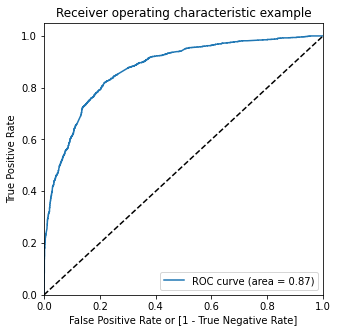

In [ ]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [ ]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.328978,0,1,1,1,1,0,0,0,0,0,0
1,0,0.081344,0,1,0,0,0,0,0,0,0,0,0
2,1,0.067362,0,1,0,0,0,0,0,0,0,0,0
3,1,0.349261,0,1,1,1,1,0,0,0,0,0,0
4,1,0.973654,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.576777  0.986505  0.195934
0.2   0.2  0.713517  0.951140  0.492647
0.3   0.3  0.771128  0.896696  0.654412
0.4   0.4  0.800045  0.821312  0.780277
0.5   0.5  0.795786  0.754770  0.833910
0.6   0.6  0.774938  0.657515  0.884083
0.7   0.7  0.747366  0.567241  0.914792
0.8   0.8  0.719121  0.468590  0.951990
0.9   0.9  0.662183  0.317822  0.982266


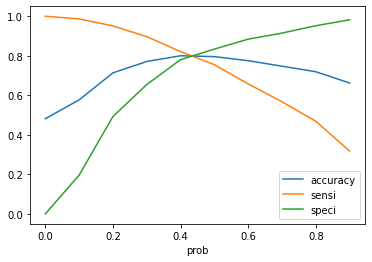

In [ ]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.328978,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.081344,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.067362,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.349261,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.973654,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7989240080699395

In [ ]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1833,  479],
       [ 418, 1731]])

In [ ]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Calculate Sensitivity

TP/(TP+FN)

0.8054909260120986

In [ ]:
# Calculate Specificity

TN/(TN+FP)

0.7928200692041523

This cutoff point seems good to go!

## Step 4: Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [ ]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [ ]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,...,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Rural and Agribusiness,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4771,0.000000,0.000000,0.0000,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6122,0.027888,0.029049,0.4375,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9202,0.015936,0.416813,0.2500,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6570,0.011952,0.378961,0.1875,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2668,0.031873,0.395246,0.2500,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [ ]:
# Check X_test_sm

X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,...,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Rural and Agribusiness,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4771,1.0,0.000000,0.000000,0.00000,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6122,1.0,0.027888,0.029049,0.43750,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9202,1.0,0.015936,0.416813,0.25000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6570,1.0,0.011952,0.378961,0.18750,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2668,1.0,0.031873,0.395246,0.25000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.011952,0.027289,0.09375,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6583,1.0,0.011952,0.152289,0.18750,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5531,1.0,0.055777,0.702025,0.87500,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3056,1.0,0.011952,0.417694,0.18750,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# Drop the required columns from X_test as well

X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'], 1, inplace = True)

In [ ]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [ ]:
y_test_pred[:10]

4771    0.997444
6122    0.121690
9202    0.706824
6570    0.321260
2668    0.545197
4233    0.912541
3368    0.771433
9091    0.509851
5972    0.188594
3631    0.770770
dtype: float64

In [ ]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head

y_pred_1.head()

,0
4771,0.997444
6122,0.121690
9202,0.706824
6570,0.321260
2668,0.545197


In [ ]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [ ]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.997444
1,0,0.121690
2,0,0.706824
3,1,0.321260
4,1,0.545197


In [ ]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [ ]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.997444
1,0,0.121690
2,0,0.706824
3,1,0.321260
4,1,0.545197


In [ ]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [ ]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.997444,1
1,0,0.121690,0
2,0,0.706824,1
3,1,0.321260,0
4,1,0.545197,1


In [ ]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7829497907949791

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[778, 218],
       [197, 719]])

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Calculate sensitivity
TP / float(TP+FN)

0.7849344978165939

In [ ]:
# Calculate specificity
TN / float(TN+FP)

0.7811244979919679

## Precision-Recall View

Let's now also build the training model using the precision-recall view

In [ ]:
#Looking at the confusion matrix again

In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1928,  384],
       [ 527, 1622]])

##### Precision
TP / TP + FP

In [ ]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8085742771684945

##### Recall
TP / TP + FN

In [ ]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7547696603071196

### Precision and recall tradeoff

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64, 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

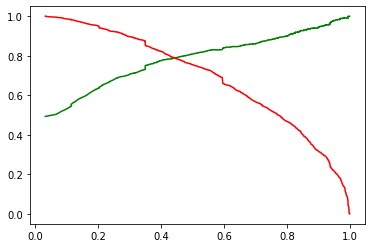

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.328978,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.081344,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.067362,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.349261,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.973654,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7966823582156467

In [ ]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1855,  457],
       [ 450, 1699]])

In [ ]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Calculate Precision

TP/(TP+FP)

0.7880333951762524

In [ ]:
# Calculate Recall

TP/(TP+FN)

0.7906002791996277

This cutoff point seems good to go!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Step 4: Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [ ]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [ ]:
y_test_pred[:10]

4771    0.997444
6122    0.121690
9202    0.706824
6570    0.321260
2668    0.545197
4233    0.912541
3368    0.771433
9091    0.509851
5972    0.188594
3631    0.770770
dtype: float64

In [ ]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head

y_pred_1.head()

,0
4771,0.997444
6122,0.121690
9202,0.706824
6570,0.321260
2668,0.545197


In [ ]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [ ]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.997444
1,0,0.121690
2,0,0.706824
3,1,0.321260
4,1,0.545197


In [ ]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [ ]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.997444
1,0,0.121690
2,0,0.706824
3,1,0.321260
4,1,0.545197


In [ ]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [ ]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.997444,1
1,0,0.121690,0
2,0,0.706824,1
3,1,0.321260,0
4,1,0.545197,1


In [ ]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7850418410041841

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[789, 207],
       [204, 712]])

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Calculate Precision

TP/(TP+FP)

0.7747551686615887

In [ ]:
# Calculate Recall

TP/(TP+FN)

0.777292576419214